In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
%matplotlib inline

In [3]:
import matplotlib 
matplotlib.rcParams["font.size"] = 16

## Lecture 40: Randomness
**Learning Objectives**

<pre>
40.1 Control a plot with
- axis limits
- pyplot.subplots to divide up a plot
- logy = True to plot a log graph

40.2 Use numpy.choice to generate random samples
- use size= to set the number of choices
- use p=[] to set the probabilities of choices
- use sort_index() and sort_value() to sort numpy.choice results
- use a seed value to determine a pseudo-random sequence

40.3 Place the results of many simulations into a dataframe and analyze them

40.4 Explain the Statistics concepts of fairness

40.5 Graph histograms of data, including normal distributions, using plot.hist()


### Remember the Iris Data? 


In [4]:
import requests
resp = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
resp.raise_for_status()

iris_fh = open("iris.data", "w")
iris_fh.write(resp.text)
iris_fh.close()

df = pd.read_csv("iris.data",
                 names=["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
df.head()

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# make a set of the classes
classes = set(df["class"])

# make a dataframe just for "Iris-virginica"
df_sub = df[df["class"] == "Iris-virginica"]

#assert allows us to force a crash...good when debugging
assert(len(df_sub) == 50)

df_sub.head()

,sep-len,sep-wid,pet-len,pet-wid,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


### Axis limits allow us to control the rectangle of a plot
<pre>
- xlim=  ,   ylim= 
- can be a single number or a tuple of size 2

<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

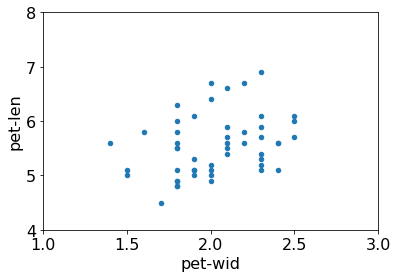

In [6]:
# play with the limits here...change them or remove them
# can you figure out what xlim and ylim do?

#df_sub.plot.scatter(x="pet-wid", y="pet-len")
#df_sub.plot.scatter(x="pet-wid", y="pet-len", xlim=1, ylim=4)
df_sub.plot.scatter(x="pet-wid", y="pet-len", xlim=(1,3), ylim=(4,8))

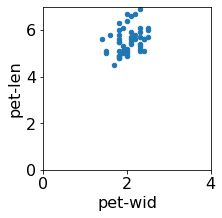

In [7]:
# can you figure out what this code is doing?
# play with xlim and ylim to cause an AssertionError

ax = df_sub.plot.scatter(x="pet-wid", y="pet-len",
                     xlim=(0,4), ylim=(0,7),
                     figsize=(3,3))
assert df_sub[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert df_sub[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert df_sub[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert df_sub[ax.get_ylabel()].max() <= ax.get_ylim()[1]

### Use Log scale for data that has a very large range:

<AxesSubplot:>

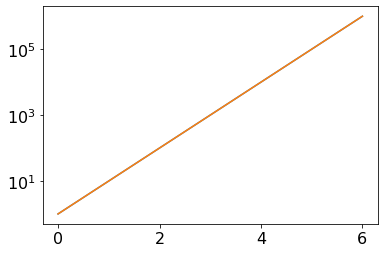

In [8]:
# fix this line plot so that it uses log scale
s = Series([1, 10, 100, 1000, 10000, 100000, 1000000])
s.plot.line()
# fix it here
s.plot.line(logy=True)

### We can splitting up a plot by using pyplot.subplots
- pyplot.subplots allows us to specify the number of cols and rows
- pyplot.subplots returns a tuple of (figure object, numpy array of axes)

(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

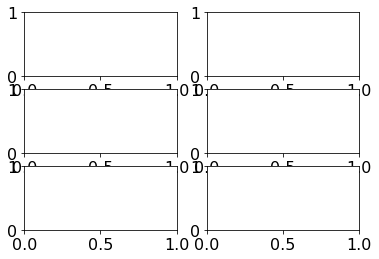

In [9]:
from matplotlib import pyplot
pyplot.subplots(nrows = 3, ncols = 2)

<AxesSubplot:>

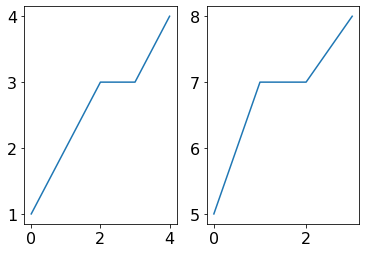

In [10]:
fig, axes = pyplot.subplots(ncols = 2)
# axes[0] # the area on the left
# axes[1] # the area on the right
Series([1,2,3,3,4]).plot.line(ax=axes[0])
Series([5,7,7,8]).plot.line(ax=axes[1])

<AxesSubplot:>

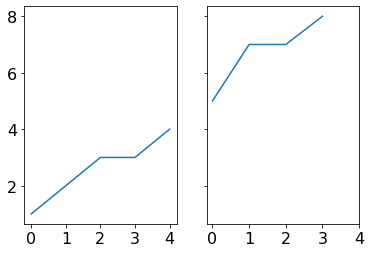

In [11]:
# sharey means 'share y axis'

fig, axes = pyplot.subplots(ncols = 2, sharey = True)
# axes[0] # the area on the left
# axes[1] # the area on the right
Series([1,2,3,3,4]).plot.line(ax=axes[0], xticks = range(5))
Series([5,7,7,8]).plot.line(ax=axes[1], xticks = range(5))

In [12]:
from numpy.random import choice
choice(["rock", "paper", "scissors"])

'rock'

### Random choice using Numpy
Even though Python has a built-in random module, the numpy module's version has benefits
- Numpy plays well with Pandas
- Numpy is optimized
- Numpy has more options

In [13]:
# choice has a keyword argument size=
# returns an object called a numpy array
choice(["rock", "paper", "scissors"], size=5)

array(['paper', 'rock', 'rock', 'paper', 'scissors'], dtype='<U8')

In [14]:
type(choice(["rock", "paper", "scissors"], size=5))

numpy.ndarray

In [15]:
# Numpy arrays can be accessed like lists
a = choice(["rock", "paper", "scissors"], size=5)
a[2]


'scissors'

In [16]:
# a numpy array can be made into a Series
from pandas import Series, DataFrame
Series(choice(["rock", "paper", "scissors"], size=5))

0    paper
1    paper
2     rock
3    paper
4    paper
dtype: object

----
### Multidimensional random Series

In [17]:
# the result of choice can be made into a 2d array
a = choice(["rock", "paper", "scissors"], size=(5, 2))
print(a)


[['rock' 'rock']
 ['paper' 'paper']
 ['rock' 'rock']
 ['scissors' 'scissors']
 ['rock' 'scissors']]


In [18]:
# make a 4x7 dataframe with random choices
DataFrame(choice(["rock", "paper", "scissors"], size=(5, 2)))

,0,1
0,paper,paper
1,scissors,scissors
2,scissors,paper
3,scissors,rock
4,paper,rock


----
### Random results will tyically not match theoretical probabilities
### but they are 'fair'

scissors    38
rock        31
paper       31
dtype: int64


<AxesSubplot:>

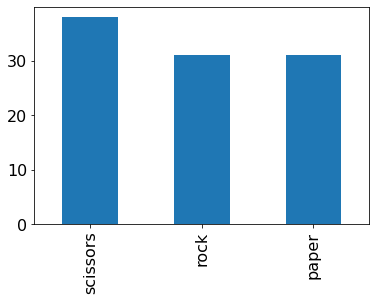

In [19]:
s = Series(choice(["rock", "paper", "scissors"], size=100))
vc = s.value_counts()
print(vc)
vc.plot.bar()

----
### Series of random results can be sorted
<pre>
- sort_index()    by index....alphabetical?)
- sort_value()    by value_counts

scissors    36
rock        34
paper       30
dtype: int64


<AxesSubplot:>

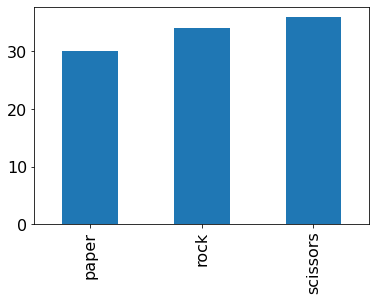

In [20]:
# sort this series by index using sort_index()
s = Series(choice(["rock", "paper", "scissors"], size=100))
vc = s.value_counts()
print(vc)
vc = vc.sort_index() # TODO
vc.plot.bar()


paper       36
rock        33
scissors    31
dtype: int64


<AxesSubplot:>

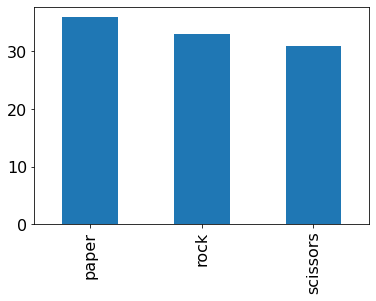

In [21]:
# sort by value_counts
s = Series(choice(["rock", "paper", "scissors"], size=100))
vc = s.value_counts()
print(vc)
vc = vc.sort_values(ascending=False) # TODO remove this
vc.plot.bar()

----
### Choice has a kwarg to allow you to control the probability of selection with a list
<pre>
- kwarg = "key word argument"
- p = [ list of floats between 0 and 1]

rock         7
paper       37
scissors    56
dtype: int64


<AxesSubplot:>

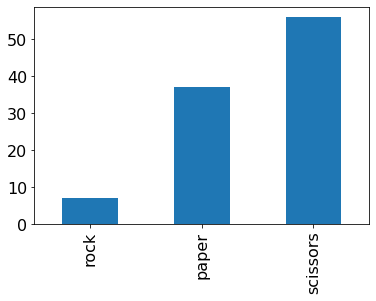

In [22]:
s = Series(choice(["rock", "paper", "scissors"], size=100, p=[0.10, 0.30, 0.60]))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ] # this allows us to choose the ordering
print(vc)
vc.plot.bar()

----
### Random integer shortcut

In [23]:
choice(6, size=5)

array([3, 2, 3, 0, 4])

### How are Pseudo-Random Numbers Generated? 
- Numpy (and most simple random generators) uses a Pseudo-Random number generator
- a starting value determines the next value, and the next value and so on
- as long as the sequence is unpredictable, and generates equally likely outcomes, we can call it random


----
### A Random Seed is a number that used to Seeding is used to generate the same sequence of random numbers
### This is done by

In [24]:
import numpy as np
np.random.seed(220)
choice(1000, size=3)
# no matter how many times you run this cell, you get the same result

array([883, 732,  15])

----
### We can make this a little more interesting by Seeding with time
It still allows us to have a different outcome each time.

We can trace the seed value when debugging

In [25]:
import time
time.time()  # number of seconds since 1-1-1970
now = int(time.time())
now
np.random.seed(now)

print("Seeded with:", now)
print(choice(1000, size=3))

Seeded with: 1619557478
[797 502  86]


----
### Big Idea in Statistics is Significance - 
### Does the data support drawing that conclusion?
### What is the probability that our results happened by chance?

----
### Is it weird that we have 60 heads, 40 tails? How often are we +- 10 of the expected

In [26]:
trials = 10
flips = 3
df = DataFrame(choice(["H","T"], size = (trials, flips)))
df

,0,1,2
0,H,H,H
1,H,T,H
2,T,H,T
3,T,H,H
4,H,H,H
5,H,T,H
6,H,H,H
7,H,T,H
8,T,H,T
9,H,T,T


In [27]:
# Instead of H and T, we can use 1 for Heads and 0 for Tails
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials, flips)))
df

,0,1,2
0,0,0,0
1,1,1,0
2,0,1,0
3,1,0,1
4,0,1,0
5,1,0,0
6,0,1,1
7,0,0,0
8,0,0,0
9,0,1,0


In [28]:
# this allows us to add up the number of heads in each row easily
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials, flips)))
print(df)
# sum across columns with axis=1 or axis = 'columns'
print(df.sum(axis=1))          # add across columns
print(df.sum(axis='columns')) # same as 1

   0  1  2
0  0  1  1
1  1  0  1
2  0  0  1
3  1  0  1
4  1  0  0
5  1  0  0
6  0  1  1
7  1  1  0
8  1  1  1
9  1  1  0
0    2
1    2
2    1
3    2
4    1
5    1
6    2
7    2
8    3
9    2
dtype: int64
0    2
1    2
2    1
3    2
4    1
5    1
6    2
7    2
8    3
9    2
dtype: int64


In [29]:
trials = 10000
flips = 100
df = DataFrame(choice([1,0], size = (trials, flips)))
print(df)
counts = df.sum(axis=1)
counts

      0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0      1   1   0   0   0   1   1   0   1   1  ...   1   0   1   0   1   0   0   
1      0   0   0   1   0   0   1   1   0   0  ...   0   0   0   0   0   0   0   
2      0   1   1   1   1   0   1   0   1   0  ...   1   0   1   1   1   0   1   
3      1   1   1   1   0   0   1   1   0   0  ...   0   1   0   1   1   0   1   
4      1   0   1   1   1   0   1   0   1   1  ...   0   1   0   0   1   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
9995   1   1   1   0   0   0   1   0   0   1  ...   0   1   1   1   0   0   0   
9996   0   1   1   0   1   0   0   1   1   1  ...   0   1   1   0   0   1   1   
9997   1   1   0   0   0   0   1   0   0   0  ...   1   1   0   0   1   0   0   
9998   0   0   1   1   1   1   0   0   0   0  ...   0   1   0   1   0   1   1   
9999   1   0   0   1   0   1   0   0   0   1  ...   1   1   1   0   1   1   0   

      97  98  99  
0      1

0       54
1       41
2       50
3       55
4       54
        ..
9995    47
9996    41
9997    44
9998    48
9999    45
Length: 10000, dtype: int64

In [30]:
# how many times will we get a total between less than 40 or more than 60 heads?
extremes = counts[(counts<=40) | (counts >=60)]
len(extremes)



569

In [31]:
# what percent of our trials is this? 
len(extremes) / trials *100

5.6899999999999995

----
### if you flip 16 coins, 10000 times, 
### what percent of the time will you get 11 or more heads?

In [32]:
flips = 16
trials = 10000
df = DataFrame(choice([1, 0], size = (trials, flips)))
counts = df.sum(axis=1)
result = counts[counts >= 11]
len(result) / trials *100

10.32

----
### How often do we see 7 heads in a row (or more) in a when flipping 16 coins

In [33]:
seven_or_more = 0
trials = 10000
for i in range(trials):
    s = "".join(choice(["H","T"], size=16))
    #print(s)
    if s.find("HHHHHHH") != -1:
        seven_or_more += 1
seven_or_more / trials * 100

4.03

### OPTIONAL TOPIC:   Graphing with Histograms

<AxesSubplot:ylabel='Frequency'>

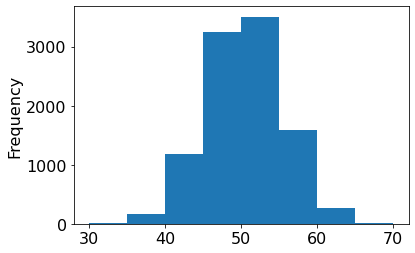

In [34]:
# frequency of heads out of 100 flips
trials = 10000
flips = 100
df = DataFrame(choice([1,0], size = (trials, flips)))
counts = df.sum(axis=1)
counts.plot.hist(bins = [30, 35, 40, 45, 50, 55, 60, 65, 70])
#counts.plot.hist(bins = range(30, 70))

<AxesSubplot:ylabel='Frequency'>

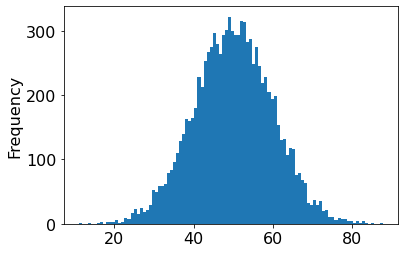

In [35]:
# this looks like a normal distribution!
from numpy.random import normal 

# loc is the center of the distribution, 
# scale is the standard deviation (a measure of spread)
s = Series(normal(size=10000, loc=50, scale=10))
s.plot.hist(bins=100)